
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


#### To be done in the Lab

The objective of this experiment is to understand feature selection.

In this experiment, we will use the dataset named as bezdekIris. The dataset has 3 classes and 4 features. 

IRIS_Dataset is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. 

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

#### Data Attributes

  1. sepal length in cm 
  2. sepal width in cm 
  3. petal length in cm 
  4. petal width in cm 
  5. class: 
     - Iris Setosa  
     - Iris Versicolour 
     - Iris Virginica

#### Data Source 

https://archive.ics.uci.edu/ml/datasets/iris

#### Feature Selection

When we use the data with large number of features or dimensionality, models usually choke because

    1. Training time increases exponentially with number of features.
    2. Models have increasing risk of overfitting with increasing number of features.

Feature Selection helps with these problems by reducing the dimensions without much loss of the total information. In other words feature selection is a field of research which wants to help algorithmically pick out important features.

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P19A06E_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "981234567" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M1W3_SAT_EXP_1" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week3/Exp5/AIML_DS_BEZDEKIRIS_STD.data")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful. Ref:", submission_id)
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
# Let us import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#Let us set up the files
dataset = "AIML_DS_BEZDEKIRIS_STD.data"

In [0]:
# Let us read the data from the file and see the first five rows of the data
data = pd.read_csv(dataset, header = None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


From above we can observe that labels are in string format. Now we will convert the labels column as 0 for "iris-setosa", 1 for "iris-versicolor" and 2 for "iris-virginica" and we will store the converted data in variable iris_data.

In [0]:
def irisLabel(s):
    s = s.lower()
    if s == "iris-setosa":
        return 0
    if s == "iris-versicolor":
        return 1
    if s == "iris-virginica":
        return 2
iris_data = pd.read_csv(dataset,header=None, converters={4:irisLabel})

In [0]:
# Now we display the first five rows of the data
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now we will see how to extract the features from the data with the example.

Let $X$ be the two class IRIS Dataset. Let $A$ be a $2 \times 4$ matrix as given below:

\begin{equation*}
A=
\begin{bmatrix}
   1 & 0 & 0 & 0\\
   0 & 1 & 0 & 0\\
\end{bmatrix}
\end{equation*}

 
 1. Compute $X' = AX$.
 2. Plot this $X'$ on 2D graph 

In [0]:
# Now we will seperate the features and labels and store them in features and lables variables.
Features = iris_data.iloc[:,0:4].values
Labels = iris_data.iloc[:,4:5].values

In [0]:
# Now we will print the features 
Features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
# Now we will print the labels
Labels

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [0]:
## Now store Feature matrix as X
X = Features

In [0]:
## We are creating a matrix 'A' as considered above.
A = np.array([[1,0,0,0],[0,1,0,0]])
print(A)

[[1 0 0 0]
 [0 1 0 0]]


As A is 2 $*$ 4 matrix. To compute X' convert X into 4 $*$ 150 using transpose function. As for matrix multiplication dimensions should match

In [0]:
X_transpose = np.transpose(X)
print(X_transpose)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
  3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
  3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
  2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
  2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
  2.6 3.  2.

Compute X' same as X1. Only the name is changed. X1 is now 2*150 dimensional. Meaning we have extracted 2 features out of 4.

X1 = np.matmul(A,X_transpose)

In [0]:
X1 = A @ X_transpose ## @ - symbol used for matrix multiplication
print(X1.shape)

(2, 150)


In [0]:
## Converting the matrix X1 back to 150*2 and append label creating X1_final of 150*3
X1 = np.transpose(X1)
X1_final = np.hstack((X1,Labels))
print(X1_final)

[[5.1 3.5 0. ]
 [4.9 3.  0. ]
 [4.7 3.2 0. ]
 [4.6 3.1 0. ]
 [5.  3.6 0. ]
 [5.4 3.9 0. ]
 [4.6 3.4 0. ]
 [5.  3.4 0. ]
 [4.4 2.9 0. ]
 [4.9 3.1 0. ]
 [5.4 3.7 0. ]
 [4.8 3.4 0. ]
 [4.8 3.  0. ]
 [4.3 3.  0. ]
 [5.8 4.  0. ]
 [5.7 4.4 0. ]
 [5.4 3.9 0. ]
 [5.1 3.5 0. ]
 [5.7 3.8 0. ]
 [5.1 3.8 0. ]
 [5.4 3.4 0. ]
 [5.1 3.7 0. ]
 [4.6 3.6 0. ]
 [5.1 3.3 0. ]
 [4.8 3.4 0. ]
 [5.  3.  0. ]
 [5.  3.4 0. ]
 [5.2 3.5 0. ]
 [5.2 3.4 0. ]
 [4.7 3.2 0. ]
 [4.8 3.1 0. ]
 [5.4 3.4 0. ]
 [5.2 4.1 0. ]
 [5.5 4.2 0. ]
 [4.9 3.1 0. ]
 [5.  3.2 0. ]
 [5.5 3.5 0. ]
 [4.9 3.6 0. ]
 [4.4 3.  0. ]
 [5.1 3.4 0. ]
 [5.  3.5 0. ]
 [4.5 2.3 0. ]
 [4.4 3.2 0. ]
 [5.  3.5 0. ]
 [5.1 3.8 0. ]
 [4.8 3.  0. ]
 [5.1 3.8 0. ]
 [4.6 3.2 0. ]
 [5.3 3.7 0. ]
 [5.  3.3 0. ]
 [7.  3.2 1. ]
 [6.4 3.2 1. ]
 [6.9 3.1 1. ]
 [5.5 2.3 1. ]
 [6.5 2.8 1. ]
 [5.7 2.8 1. ]
 [6.3 3.3 1. ]
 [4.9 2.4 1. ]
 [6.6 2.9 1. ]
 [5.2 2.7 1. ]
 [5.  2.  1. ]
 [5.9 3.  1. ]
 [6.  2.2 1. ]
 [6.1 2.9 1. ]
 [5.6 2.9 1. ]
 [6.7 3.1 1. ]
 [5.6 3.  

##### Putting it all together

In [0]:
## Now store Feature matrix as X
X = Features

## Create matrix A as given in the Exercise above
A = np.array([[1,0,0,0],[0,0,0,1]])

## As A is 2*4 matrix. To compute X' convert X into 4*150 using transpose function. 
##As for matrix multiplication dimensions should match
X_transpose = np.transpose(X)

## Compute X' same as X1. Only the name is changed. X1 is now 2*150 dimensional.
## Meaning we have extracted 2 features out of 4
X1 = A @ X_transpose

## Convert the matrix X1 back to 150*2 and append label creating X1_final of 150*3
X1 = np.transpose(X1)
X1_final = np.hstack((X1,Labels))

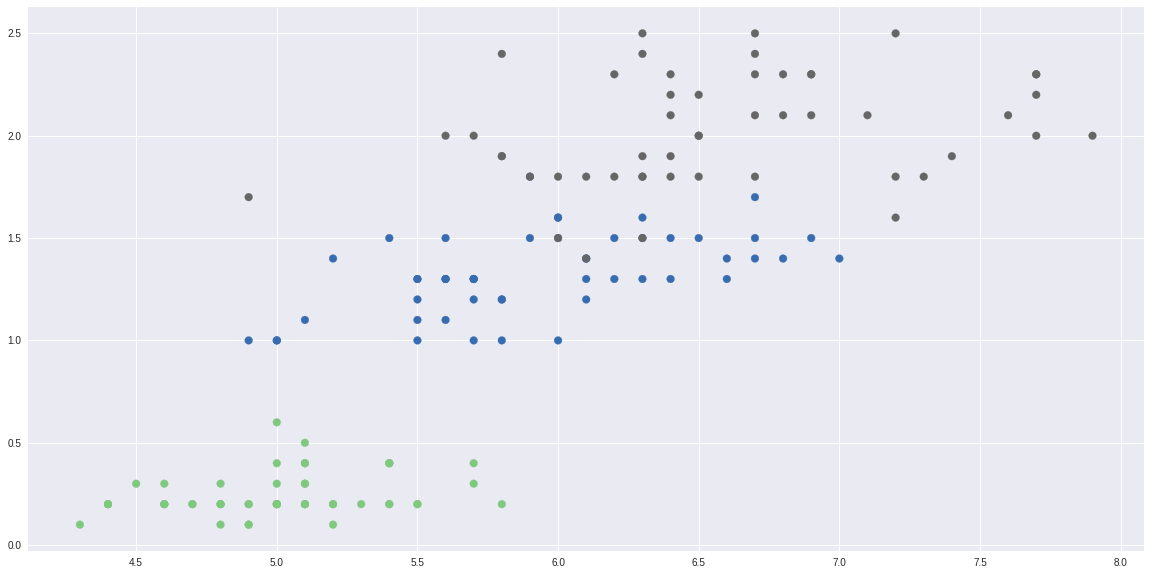

In [0]:
#Plot the points on graph and visualize.
plt.figure(1, figsize=(20,10))
plt.scatter(X1_final[:,0],X1_final[:,1],c=X1_final[:,2],s=60,cmap="Accent")
plt.show()

# Exercise 1
Repeat the above Example with a new matrix A, given below;

\begin{equation*}
A2 =
\begin{bmatrix}
   0 & 1 & 0 & 0\\
   0 & 0 & 1 & 0\\
\end{bmatrix}
\end{equation*}

 1. Compute $X^{\prime} = AX$ ? 
 2. Plot this X on 2D graph.

In [0]:
### Your Code Here

# Exercise 2
Repeat the above Example with a new matrix A, given below;
\begin{equation*}
A3 = 
\begin{bmatrix}
   0 & 0 & 1 & 0\\
   0 & 0 & 0 & 1\\
\end{bmatrix}
\end{equation*}
 1. Compute $X^{\prime} = AX$ ? 
 2. Plot this X on 2D graph.

In [0]:
### Your Code Here

# Exercise 3

Of the 6 possible projection matrices we have tried out 3. Try out the other three also.

In [0]:
### Your Code Here

## Note
$A$ is selecting 2 features to plot Iris Dataset. $A$ is $2 \times 4$ matrix where 2 means number of features you want and 4 means total number of features in Dataset. 

### Summary

We mainly use feature selection techinques to get insights about the features and their relative importance with the target variable.The idea is to keep most relevant but not redundant feature for predictive model that can yield optimal accuracy.

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful. Ref: 2575
